# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?



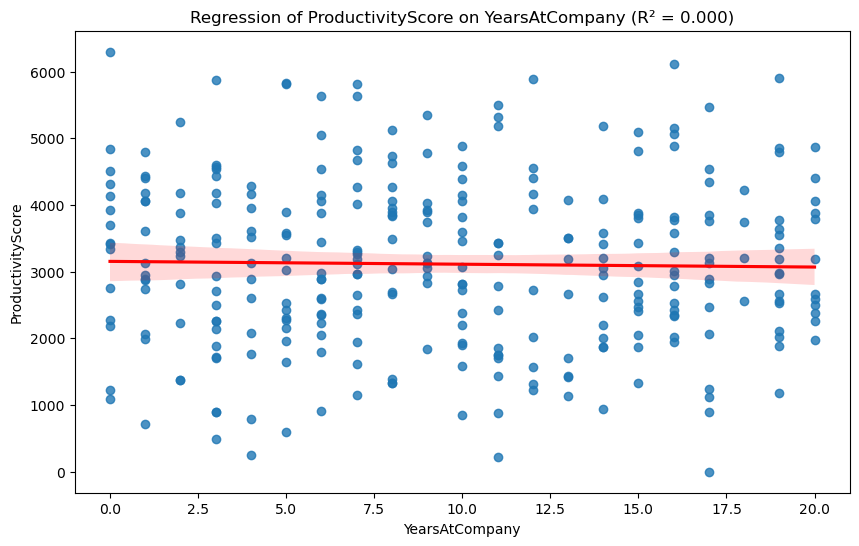

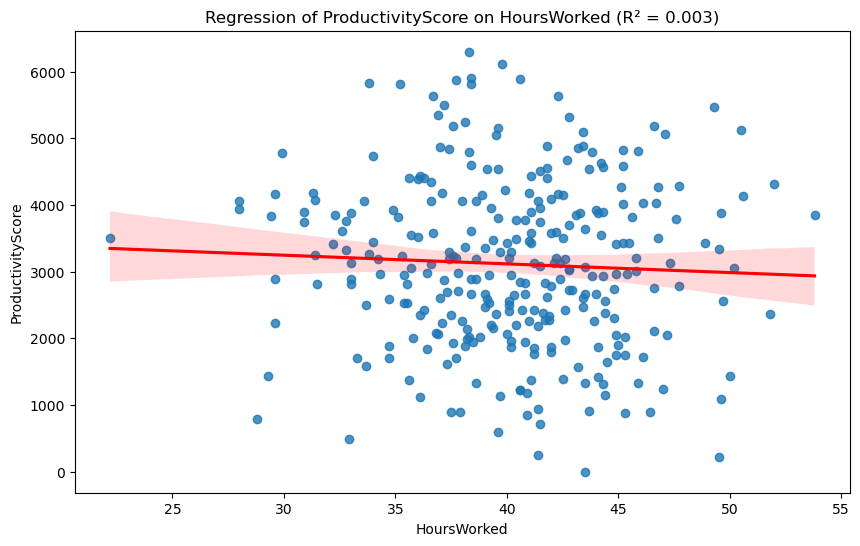

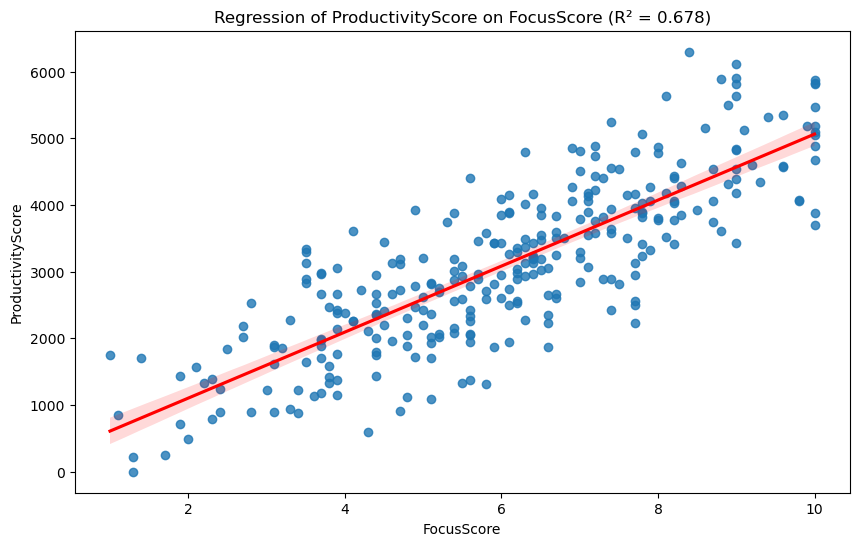

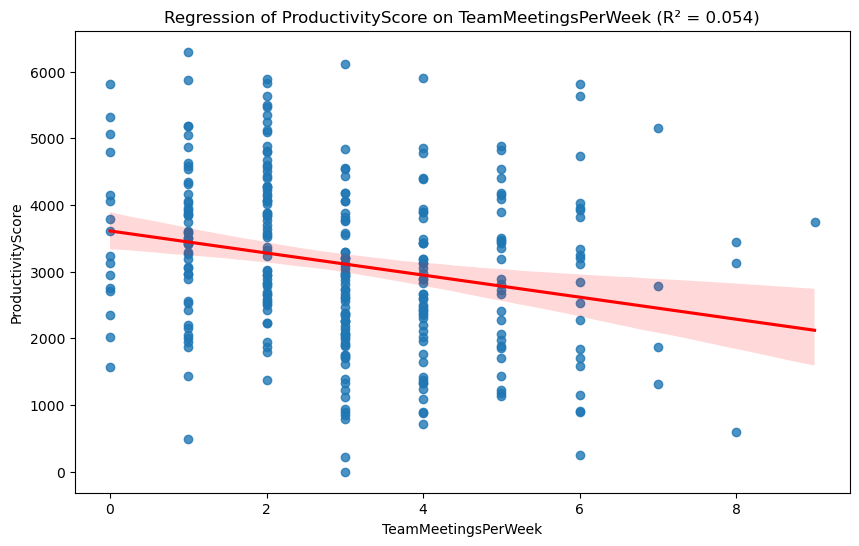

R² Values for Regression Analysis:
R² for Years at Company: 0.000
R² for Hours Worked: 0.003
R² for Focus Score: 0.678
R² for Team Meetings per Week: 0.054


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Load the dataset
df = pd.read_csv('Employee_productivity.csv')

# Function calculating and showing regression with R²
def plot_regression(x, y="ProductivityScore"):
    X = df[[x]].dropna()
    Y = df[y].loc[X.index]

    model = LinearRegression()
    model.fit(X, Y)
    predictions = model.predict(X)

    r2 = r2_score(Y, predictions)

    plt.figure(figsize=(10, 6))
    sns.regplot(x=X, y=y, data=df, line_kws={"color": "red"})
    plt.title(f'Regression of {y} on {x} (R² = {r2:.3f})')
    plt.show()
    return r2
r2_years = plot_regression('YearsAtCompany')
r2_hours = plot_regression('HoursWorked')
r2_focus = plot_regression('FocusScore')
r2_meetings = plot_regression('TeamMeetingsPerWeek')

# Print R² values
print('R² Values for Regression Analysis:')
print(f'R² for Years at Company: {r2_years:.3f}')
print(f'R² for Hours Worked: {r2_hours:.3f}')
print(f'R² for Focus Score: {r2_focus:.3f}')
print(f'R² for Team Meetings per Week: {r2_meetings:.3f}')


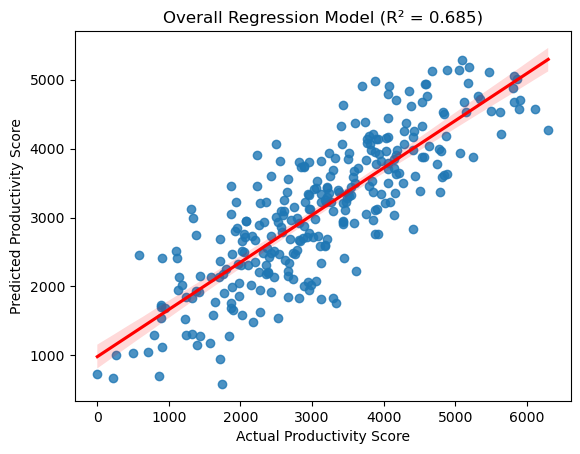

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features
features = ["YearsAtCompany", "HoursWorked", "FocusScore", "TeamMeetingsPerWeek", "DeskLocation", "Department"]

X = df[features]
y = df["ProductivityScore"]

# Handle categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), ["DeskLocation", "Department"]),
        ("num", "passthrough", ["YearsAtCompany", "HoursWorked", "FocusScore", "TeamMeetingsPerWeek"])
    ]
)

# Regression model
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("regressor", LinearRegression())])

model.fit(X, y)
y_pred = model.predict(X)
overall_r2 = r2_score(y, y_pred)

sns.regplot(x=y, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Productivity Score")
plt.ylabel("Predicted Productivity Score")
plt.title(f'Overall Regression Model (R² = {overall_r2:.3f})')
plt.show()


# Findings:

 - Focus Score shows the strongest positive linear relationship with productivity (highest R²).

 - Hours Worked has only a modest correlation → working longer ≠ always more productive.

 - Years at Company explains very little variance → tenure doesn’t drive productivity.

 - Meetings per Week negatively correlate with productivity → more meetings = less output.

 - Desk Location and Department matter in the combined model (open-plan desks reduce productivity compared to remote/private offices).

 - Overall, the multivariate model R² is stronger than any single feature, confirming that productivity is influenced by multiple factors.

# Recommendations:

 - Reduce unnecessary meetings to protect focus time.

 - Improve work environments (private spaces or hybrid flexibility instead of open-plan).

 - Emphasize focus through training, tools, and reduced distractions.

 - Streamline or automate administrative work so employees don’t rely on overtime.

 - Promote collaboration between tenured and new employees through mentoring rather than assuming productivity differences.